In [1]:
import numpy as np
from time import perf_counter

class GradientDescent:

    def _show_data(fun):
        def show_data_wrapper(*args, **kwargs):
            start_time = perf_counter()
            minimum, x, it = fun(*args, **kwargs)
            end_time = perf_counter()
            exec_time = end_time - start_time
            if kwargs.get('show_data', False):
                print(f'Found minimum at:')
                print(''.join([f'x{i+1} = {value}\n' for i, value in enumerate(x)]), end='')
                print(f'Minimum value: {minimum}')
                print(f'Iterations: {it}')
                print(f'Execution time: {exec_time}')
                print('-----------------------')
            return minimum, x, it
        return show_data_wrapper

    @staticmethod
    @_show_data
    def solve(fun, gradient, eps, beta, *args, **kwargs):
        it = 0
        x = np.array(args)
        gradient_value = np.array(gradient(*x))
        if not gradient_value.ndim: gradient_value = np.array([gradient_value])
        while any(abs(value) >= eps for value in gradient_value):
            it+=1
            x = x - beta*gradient_value
            gradient_value = np.array(gradient(*x))
            if not gradient_value.ndim: gradient_value = np.array([gradient_value])
        return fun(*x), x, it


In [2]:
f = lambda x: 2*x**2 + 3*x -1
gradient_f = lambda x: 4*x + 3

g = lambda x1, x2: 1 - 0.6*np.exp(-x1**2 - x2**2) - 0.4*np.exp(-(x1 + 1.75)**2 - (x2-1)**2)
gradient_g = lambda x1, x2: (1.2*x1*np.exp(-x1**2 - x2**2) + 0.8*(x1 + 1.75)*np.exp(-(x1 + 1.75)**2 - (x2 -1)**2),
                                1.2*x2*np.exp(-x1**2 - x2**2) + 0.8*(x2 -1)*np.exp(-(x1 + 1.75)**2 - (x2 -1)**2))

GradientDescent.solve(g, gradient_g, 0.00000000001, 0.25, 1, 2, show_data=True);
GradientDescent.solve(f, gradient_f, 0.00000000001, 0.25, 100, show_data=True);


Found minimum at:
x1 = -0.02194824923868987
x2 = 0.012541856713508309
Minimum value: 0.39276746841039845
Iterations: 139
Execution time: 0.0029445610000493616
-----------------------
Found minimum at:
x1 = -0.75
Minimum value: -2.125
Iterations: 1
Execution time: 7.483000013053243e-05
-----------------------


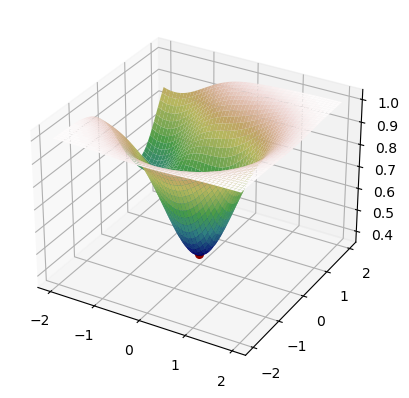

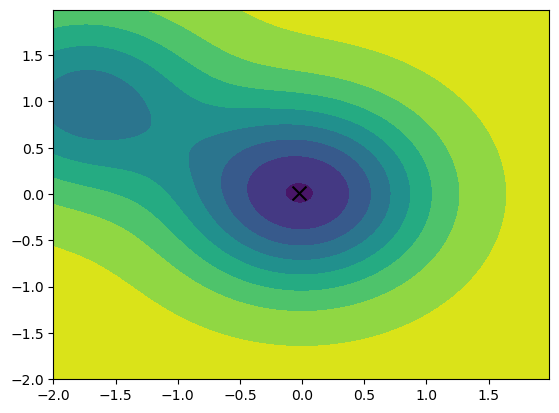

In [3]:
import matplotlib.pyplot as plt
from matplotlib import cm

x1 = np.arange(-2, 2, 0.01)
x2 = np.arange(-2, 2, 0.01)
x1, x2 = np.meshgrid(x1, x2)
z = g(x1, x2)

minimum, x, it = GradientDescent.solve(g, gradient_g, 0.000000000001, 0.25, -2, -2, show_data=False);

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(x1, x2, z, cmap=cm.gist_earth)
ax.scatter(x[0], x[1], minimum, c='darkred', s=30)

plt.show()

fig, ax = plt.subplots()

ax.tricontourf(x1.flatten(), x2.flatten(), z.flatten())
ax.scatter(x[0], x[1], color='black', marker='x', s=100)

plt.show()



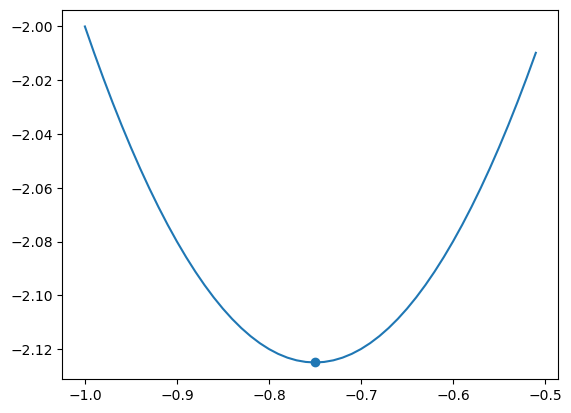

In [4]:
x_axis = np.arange(-1, -0.5, 0.01)
y = f(x_axis)

minimum, x, it = GradientDescent.solve(f, gradient_f, 0.0000000001, 0.25, 1453, show_data=False);

fig, ax = plt.subplots()

ax.plot(x_axis, y)
ax.scatter(x, minimum)

plt.show()
